In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import numpy as np
import pandas as pd 
import os, json, pickle
import networkx as nx


In [3]:
import sys 
sys.path.append('../src')

from spaceoracle.oracles import SpaceOracle
from spaceoracle.tools.network import DayThreeRegulatoryNetwork, MouseKidneyRegulatoryNetwork

%config InlineBackend.figure_format = 'retina'

co_grn = DayThreeRegulatoryNetwork()
adata = sc.read_h5ad('.cache/adata_train.h5ad')

2024-11-09 18:40:48.452969: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
so = SpaceOracle(
    adata=adata,
    save_dir='/ix/djishnu/shared/djishnu_kor11/models',
    annot='rctd_cluster', 
    grn=co_grn
)

In [7]:
goi = 'Il2ra'

_ = so.perturb(target=goi, n_propagation=1, gene_expr=0)

with open('.cache/lymph/beta_dict.pkl', 'wb') as f:
    pickle.dump(so.beta_dict, f)

Computing beta_dict


Running simulation 1/1: 100%|██████████| 11567/11567 [25:14<00:00,  7.64it/s] 


In [ ]:
from scipy.spatial.distance import cdist

X = adata.obsm['spatial']

distances = cdist(X, X)
distances.shape

(11567, 11567)

In [11]:
betas = so.beta_dict[goi].betas.values
beta_diffs = cdist(betas, betas)
beta_diffs.shape

(11567, 11567)

In [ ]:
_ = plt.hist(beta_diffs)

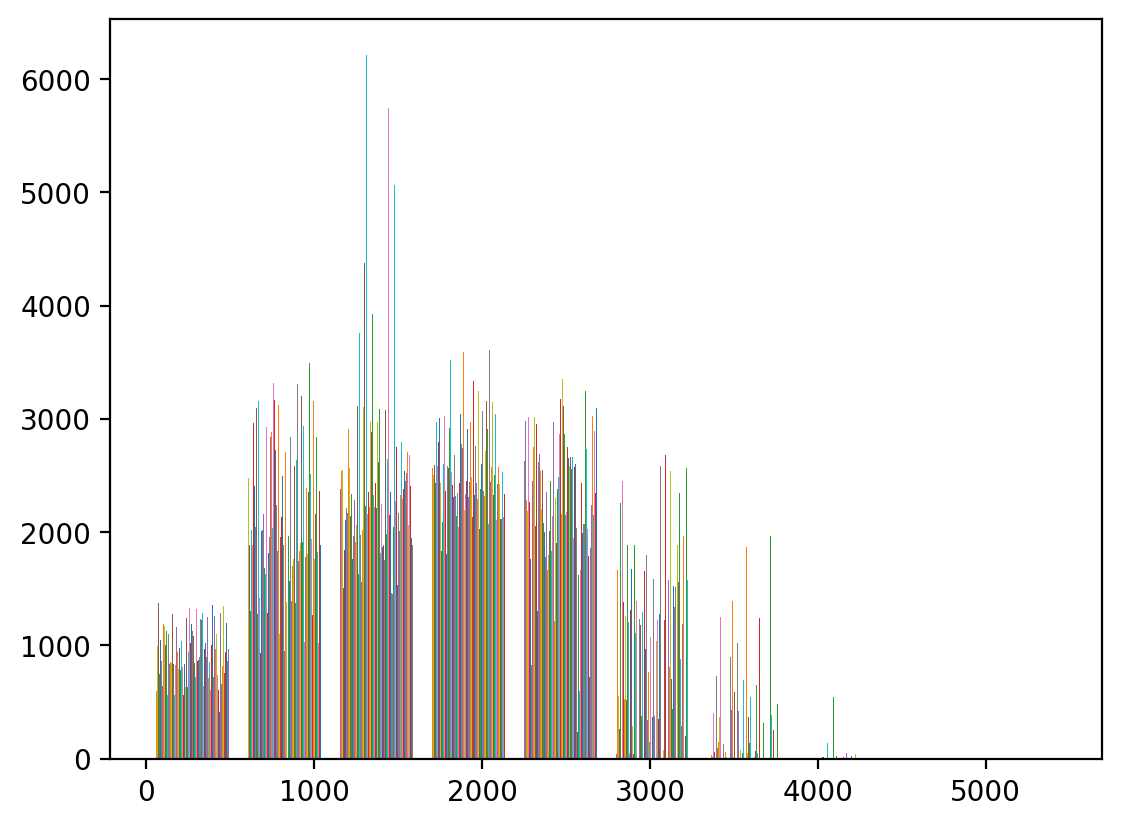

In [13]:
_ = plt.hist(distances)

In [ ]:
scores = beta_diffs / (1 + distances)
plt.hist(scores)

In [ ]:
G = nx.from_numpy_array(scores, create_using=nx.Graph())
len(G.nodes, G.edges)

In [ ]:
nx.louvain_communities(G)